In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def generate_data(nx, qtde, tipo='ambos'):
    x = np.linspace(-1, 1, nx).reshape(-1, 1)
    y = []
    dy = []

    for _ in range(qtde):
        
        A = np.random.uniform(-1.0, 1.0)
        a = np.random.uniform(0.1, 1.0)

        if tipo == 'ordem3':
            # y = A * (x - a)(x + a)x = A * (x^3 - a^2 x)
            coeffs = A * np.poly([a, -a, 0])
        elif tipo == 'ordem4':
            b = np.random.uniform(0.1, 1.0)
            # y = A * (x - a)(x + a)(x - b)(x + b)
            coeffs = A * np.poly([a, -a, b, -b])
        else:  # mistura dos dois
            if np.random.rand() < 0.5:
                coeffs = A * np.poly([a, -a, 0])
            else:
                b = np.random.uniform(0.1, 1.0)
                coeffs = A * np.poly([a, -a, b, -b])

        poly_vals = np.polyval(coeffs, x)
        deriv_vals = np.polyval(np.polyder(coeffs), x)

        norm = np.max(np.abs(poly_vals))
        dev_norm = np.max(np.abs(deriv_vals))
        y.append(poly_vals / norm + 0.05 * np.random.randn(len(x)).reshape(-1, 1))
        dy.append(deriv_vals / dev_norm + 0.05 * np.random.randn(len(x)).reshape(-1, 1))

    y = np.hstack(y).T
    dy = np.hstack(dy).T
    return y, dy

# Gerar dados
y, dy = generate_data(nx=50, qtde=1000, tipo='ambos')

# Exibir dimensões dos dados
print("Shape y:", y.shape)
print("Shape dy:", dy.shape)

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(y, dy, test_size=0.2, random_state=42)

# Definir o modelo
neurons = 10
layers = 10

model = MLPRegressor(
    hidden_layer_sizes=tuple([neurons] * layers), 
    activation='tanh',
    solver='adam',
    max_iter=10000, 
    random_state=42,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    n_iter_no_change=50,
    tol=1e-8,
    verbose=True
)

# Treinamento
model.fit(X_train, y_train)

# Teste
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")

Shape y: (1000, 50)
Shape dy: (1000, 50)
Iteration 1, loss = 0.11731234
Iteration 2, loss = 0.10887216
Iteration 3, loss = 0.10401470
Iteration 4, loss = 0.10115717
Iteration 5, loss = 0.09902252
Iteration 6, loss = 0.09686002
Iteration 7, loss = 0.09456782
Iteration 8, loss = 0.09216340
Iteration 9, loss = 0.08975608
Iteration 10, loss = 0.08733083
Iteration 11, loss = 0.08483941
Iteration 12, loss = 0.08221804
Iteration 13, loss = 0.07942551
Iteration 14, loss = 0.07650300
Iteration 15, loss = 0.07343874
Iteration 16, loss = 0.07027357
Iteration 17, loss = 0.06701663
Iteration 18, loss = 0.06363142
Iteration 19, loss = 0.06020907
Iteration 20, loss = 0.05676490
Iteration 21, loss = 0.05335833
Iteration 22, loss = 0.05000101
Iteration 23, loss = 0.04672472
Iteration 24, loss = 0.04359720
Iteration 25, loss = 0.04058585
Iteration 26, loss = 0.03774862
Iteration 27, loss = 0.03511458
Iteration 28, loss = 0.03268592
Iteration 29, loss = 0.03044015
Iteration 30, loss = 0.02844443
Iteratio

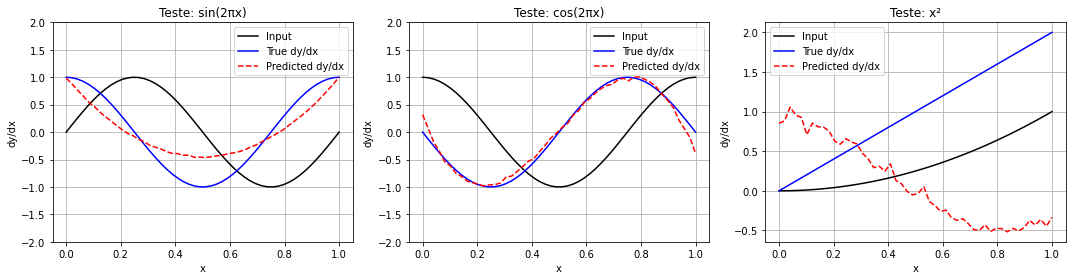

In [4]:
# Teste com funções conhecidas
plt.figure(figsize=(15, 4))
new_x = np.linspace(0, 1, y.shape[1]).reshape(1, -1)

# Teste 1: seno
plt.subplot(131)
new_y = np.sin(2 * np.pi * new_x)
new_dy = np.cos(2 * np.pi * new_x)
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.title('Teste: sin(2πx)')
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# Teste 2: cosseno
plt.subplot(132)
new_y = np.cos(2 * np.pi * new_x)
new_dy = -np.sin(2 * np.pi * new_x)
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.title('Teste: cos(2πx)')
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# Teste 3: parabólica
plt.subplot(133)
new_y = new_x ** 2
new_dy = 2 * new_x
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.title('Teste: x²')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
